In [2]:
import wfdb
import numpy as np

In [7]:


DB = ['09', '06', '03', '00']
L = ['1', '2', '3', '4', '5']
C = ['0','2','4']

a = np.zeros((1,75000))
b = np.zeros((1,75000))



for c in C:
    for l in L:
        for dB in DB:

            try:

                # Set the path to your data files
                dat_file = '.\sub02\snr'+dB+'dB\sub02_snr'+dB+'dB_l'+l+'_c'+c+'_mecg'
                hea_file = '.\sub02\snr'+dB+'dB\sub02_snr'+dB+'dB_l'+l+'_c'+c+'_mecg'

                # Read the header file to get information about the data
                record = wfdb.rdheader(hea_file)

                # Read the data file
                signals, fields = wfdb.rdsamp(dat_file)

                # Set the path to your data files
                dat_file2 = '.\sub02\snr'+dB+'dB\sub02_snr'+dB+'dB_l'+l+'_c'+c+'_noise1'
                hea_file2 = '.\sub02\snr'+dB+'dB\sub02_snr'+dB+'dB_l'+l+'_c'+c+'_noise1'

                # Read the header file to get information about the data
                record2 = wfdb.rdheader(hea_file2)
                # Read the data file
                signals2, fields2 = wfdb.rdsamp(dat_file2)

                # Set the path to your data files
                dat_file3 = '.\sub02\snr00dB\sub02_snr00dB_l'+l+'_c'+c+'_noise2'
                hea_file3 = '.\sub02\snr00dB\sub02_snr00dB_l'+l+'_c'+c+'_noise2'

                # Read the header file to get information about the data
                record3 = wfdb.rdheader(hea_file3)
                # Read the data file
                signals3, fields3 = wfdb.rdsamp(dat_file3)

                for n in range(34):

                    s = signals[:,n].reshape(1,75000)
                    n1 = signals2[:,n].reshape(1,75000)
                    n2 = signals2[:,n].reshape(1,75000)

                    a = np.concatenate((a,s+n1,s+n2),axis=0)
                    b = np.concatenate((b,s,s),axis=0)

            except:
                
                pass

            

In [70]:
import wfdb

# Replace 'your_record' with the actual name of your record file (without extension)
record_name = './sub02/snr12dB/sub02_snr12dB_l1_c0_fecg1'

# Read the header file to get information, including the sampling frequency
record = wfdb.rdheader(record_name)

# Extract the sampling frequency
fs = record.fs

# Print the sampling frequency
print(f"Sampling Frequency (fs): {fs} Hz")

Sampling Frequency (fs): 250 Hz


In [14]:
b_2 = b[:, :74752]
a_2 = a[:, :74752]

(40000.0, 42000.0)

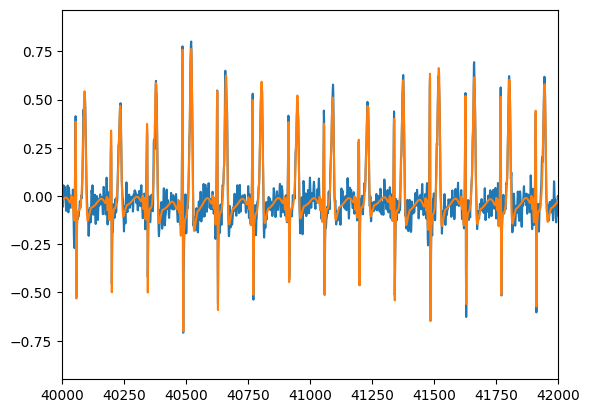

In [30]:
plt.plot(a_2[100])
plt.plot(b_2[100])
plt.xlim(40e3, 42e3)

In [15]:
b_3 = b_2.reshape(-1,1024)
a_3 = a_2.reshape(-1,1024)

In [40]:
np.save('second_db_clean.npy', b_3)
np.save('second_db_noisy.npy', a_3)

In [17]:
import numpy as np
import matplotlib.pyplot as plt


# Creo un banco de ruido de motion artifact y baseline wander

In [42]:
import wfdb
import numpy as np

record_name = 'em'

noise , fields = wfdb.rdsamp('./em')

ma_noise_1 = noise[:, 0].reshape((1, 650000))
ma_noise_2 = noise[:, 1].reshape((1, 650000))

ma_noise_1 = ma_noise_1[:,:645120]
ma_noise_2 = ma_noise_2[:,:645120]

ma_noise_1 = ma_noise_1.reshape((-1, 1024))
ma_noise_2 = ma_noise_1.reshape((-1, 1024))


ma_noise = np.concatenate((ma_noise_1, ma_noise_2), axis = 0)

In [43]:
import wfdb
import numpy as np

record_name = 'bw'

noise , fields = wfdb.rdsamp('./bw')

bw_noise_1 = noise[:, 0].reshape((1, 650000))
bw_noise_2 = noise[:, 1].reshape((1, 650000))

bw_noise_1 = bw_noise_1[:,:645120]
bw_noise_2 = bw_noise_2[:,:645120]

bw_noise_1 = bw_noise_1.reshape((-1, 1024))
bw_noise_2 = bw_noise_2.reshape((-1, 1024))

bw_noise = np.concatenate((bw_noise_1, bw_noise_2), axis = 0)

In [44]:
bw_and_ma_noise = np.concatenate((ma_noise, bw_noise), axis = 0)

In [45]:
bw_and_ma_noise.shape

(2520, 1024)

In [62]:
clean = b_3
noisy = a_3

In [63]:
# Generate a random set of indices for the sample
sample_indices = np.random.choice(clean.shape[0], size=10000, replace=False)

# Use the indices to select the same set of rows from both arrays
clean_subset = clean[sample_indices, ...]
noisy_subset = noisy[sample_indices, ...]

In [64]:
sample_indices = np.random.choice(10000, size=2520, replace=False)

j = 0
for i in sample_indices:
    noisy_subset[i] += bw_and_ma_noise[j]
    j+=1

In [65]:
sample_indices

array([7359, 8248, 7706, ..., 3227, 3720, 4851])

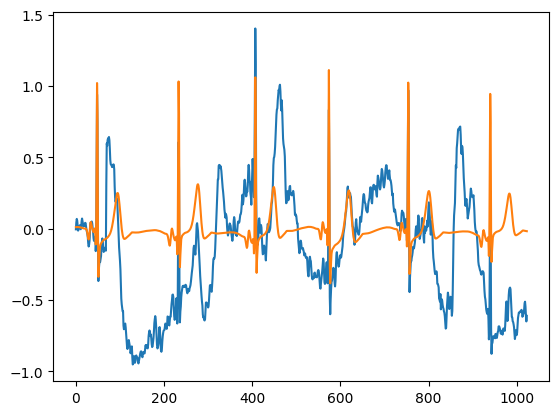

In [67]:
plt.plot(noisy_subset[7359])
plt.plot(clean_subset[7359])

In [68]:
np.save('second_db_clean.npy', clean_subset)
np.save('second_db_noisy.npy', noisy_subset)

In [69]:
clean_subset.shape

(10000, 1024)